In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
data_file = 'CoffeeAndCode.csv'

data_frame = pd.read_csv(data_file, encoding="UTF-8")
data_frame['AgeRange'] = data_frame['AgeRange'].fillna('18 to 29')
data_frame.head()
# All table

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,Lebanon,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,Lebanon,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,Lebanon,18 to 29
3,8,2,Before coding,No,Nescafe,Yes,Male,Lebanon,18 to 29
4,10,3,While coding,Sometimes,Turkish,No,Male,Lebanon,18 to 29


In [4]:
ds = data_frame

In [5]:
ds.dtypes

CodingHours             int64
CoffeeCupsPerDay        int64
CoffeeTime             object
CodingWithoutCoffee    object
CoffeeType             object
CoffeeSolveBugs        object
Gender                 object
Country                object
AgeRange               object
dtype: object

In [16]:
age_range = ds.groupby('AgeRange').count()
age_range

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country
AgeRange,,,,,,,,
18 to 29,62,62,62,62,61,62,62,62
30 to 39,29,29,29,29,29,29,29,29
40 to 49,6,6,6,6,6,6,6,6
50 to 59,1,1,1,1,1,1,1,1
Under 18,2,2,2,2,2,2,2,2


In [17]:
coding_hours = ds.groupby('CodingHours').count()
coding_hours

,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
CodingHours,,,,,,,,
1,1,1,1,1,1,1,1,1
2,9,9,9,9,9,9,9,9
3,10,10,10,10,10,10,10,10
4,8,8,8,8,8,8,8,8
5,6,6,6,6,6,6,6,6
6,14,14,14,14,14,14,14,14
7,10,10,10,10,10,10,10,10
8,19,19,19,19,19,19,19,19
9,6,6,6,6,6,6,6,6


In [18]:
age_range_frequency = age_range.apply(lambda x: x/100)
age_range_frequency

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country
AgeRange,,,,,,,,
18 to 29,0.62,0.62,0.62,0.62,0.61,0.62,0.62,0.62
30 to 39,0.29,0.29,0.29,0.29,0.29,0.29,0.29,0.29
40 to 49,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
50 to 59,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Under 18,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [19]:
coding_hours_frequency = coding_hours.apply(lambda x: x/100)
coding_hours_frequency

,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,Country,AgeRange
CodingHours,,,,,,,,
1,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
3,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
4,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08
5,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
6,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14
7,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
8,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19
9,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


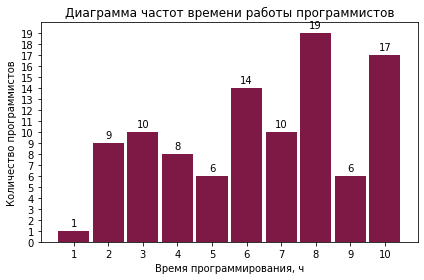

In [69]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots()
position = [pos for pos in range(1, 11)]
rects = axis.bar(position, coding_hours.CoffeeTime, 0.9, color="#7E1946")
axis.set_xlabel('Время программирования, ч')
axis.set_ylabel('Количество программистов')
axis.set_xticks(position)
axis.set_yticks([tick for tick in range(0, max(coding_hours.CoffeeTime)+1)])
plt.title('Диаграмма частот времени работы программистов')

def autolabel(rects, axis, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        axis.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

autolabel(rects, axis)
figure.tight_layout()
plt.show()

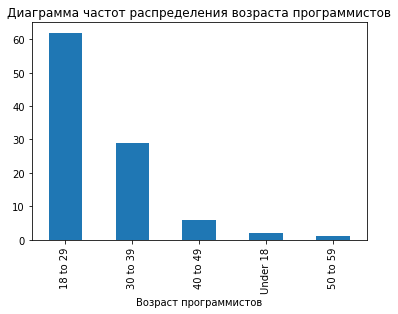

In [54]:
age_range['CoffeeTime'].sort_values()[::-1].plot(kind='bar')
plt.title('Диаграмма частот распределения возраста программистов')
plt.xlabel('Возраст программистов')
plt.show()

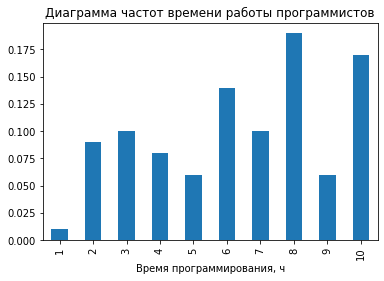

In [55]:
coding_hours_frequency['CoffeeTime'].plot(kind='bar')
plt.title('Диаграмма частот времени работы программистов')
plt.xlabel('Время программирования, ч')
plt.show()

In [50]:
empirical_coding_hours = pd.DataFrame({"CodingHours": [coding_hours_frequency[:limit]['CoffeeTime'].sum() for limit in range(0, 11)]})
empirical_coding_hours

,CodingHours
0,0.00
1,0.01
2,0.10
3,0.20
4,0.28
5,0.34
6,0.48
7,0.58
8,0.77
9,0.83


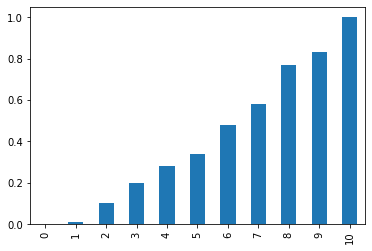

In [81]:
empirical_coding_hours['CodingHours'].plot(kind='bar')

In [100]:
empirical_age_range = pd.DataFrame({"AgeRange": [age_range_frequency.sort_values(by=['CoffeeTime'])[:limit]['CoffeeTime'].sum() for limit in range(len(age_range_frequency)+1)]})
empirical_age_range

,AgeRange
0,0.00
1,0.01
2,0.03
3,0.09
4,0.38
5,1.00


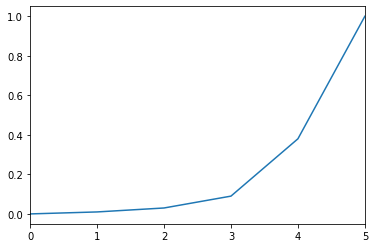

In [101]:
empirical_age_range['AgeRange'].plot()